1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la

Eigenvalues: 1
Eigenvectors: [[-0.1320821  -0.81649658  0.56203883]
 [-0.55627208 -0.40824829 -0.72380571]
 [-0.82043628  0.40824829  0.40027196]]

Eigenvalues SVD: [2.58513479e+01 1.97030154e+00 4.62641724e-32]
Eigenvectors SVD: [[-0.13206788  0.56204218 -0.81649658]
 [-0.55629039 -0.72379164 -0.40824829]
 [-0.82042616  0.40029271  0.40824829]]

Percent of the total variability dataset of component 0, 1, 2 respectively are  92.91809947992535 %, 7.081900520074646 %, 92.91809947992535 %


Text(0.5, 1.0, 'New basis x1-x3')

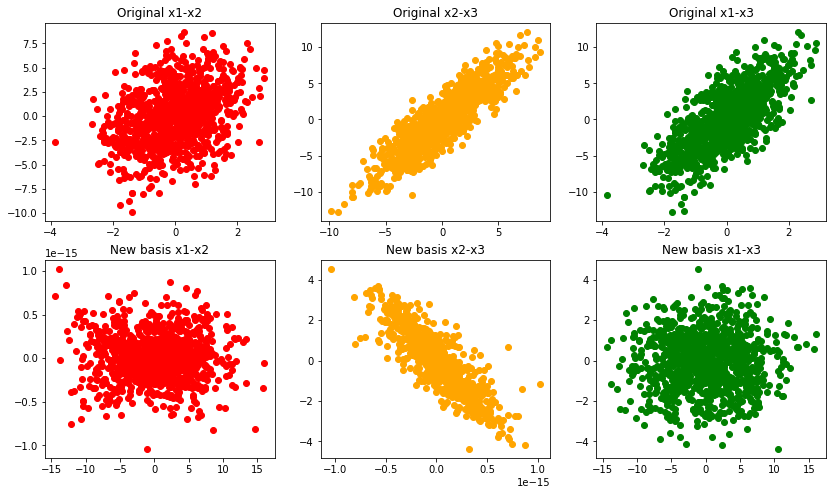

In [2]:
# generating a dataset stimulating 3 features
N = 1000
x1 = np.random.normal(0, 1, size = N)
x2 = x1 + np.random.normal(0, 3, size = N)
x3 = 2*x1 + x2

m = np.matrix( [x1, x2, x3] )
cov = np.cov(m)

# finding the eigenvectors and eigenvalues using covariance Matrix
l, V  = la.eig(cov)
l = np.real_if_close(1)

print('Eigenvalues:', l)
print('Eigenvectors:', V)

# finding the eigenvectors and eigenvalues using SVD
U, S, Vt = la.svd(m)
lsvd = S**2 / (N-1)
Vsvd = U

print('\nEigenvalues SVD:', lsvd)
print('Eigenvectors SVD:', Vsvd)

#percent of the total dataset's variability
#component 0,1,2
l, V = np.linalg.eig(cov)
lamb = np.diag(lsvd)
c0 = 100*lamb[0,0]/lamb.trace()
c1 = 100*lamb[1,1]/lamb.trace()
c2 = 100*lamb[0,0]/lamb.trace()

print('\nPercent of the total variability dataset of component 0, 1, 2 respectively are ', c0, '%,', c1, '%,', c2, '%')

#Plot the data, in both the original and the new basis
#Redefine data based on PCA
x = np.vstack([x1, x2, x3])
xp = np.dot(V.T,x)
id = np.argmin(l) #removing eigenvalue's index

x_reduced = V.dot(np.diag(l).dot(xp))/np.sum(l) #dimension reduction in original coordinate

#Plot the original data in the original and PCA basis
fig, axs = plt.subplots(2, 3, figsize=(14, 8))
axs[0, 0].scatter(x[0], x[1],  c='red')
axs[0, 0].set_title('Original x1-x2')
axs[0, 1].scatter(x[1], x[2], c='orange')
axs[0, 1].set_title('Original x2-x3')
axs[0, 2].scatter(x[0], x[2], c='green')
axs[0, 2].set_title('Original x1-x3')
axs[1, 0].scatter(xp[0], xp[1], c='red')
axs[1, 0].set_title('New basis x1-x2')
axs[1, 1].scatter(xp[1], xp[2], c='orange')
axs[1, 1].set_title('New basis x2-x3')
axs[1, 2].scatter(xp[0], xp[2], c='green')
axs[1, 2].set_title('New basis x1-x3')



2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [3]:
# Add 10 noisy variables
noises = list(range(10))
for i in range(10):
    noises[i] = np.random.normal(0, 1/20 , N)

x = np.vstack([x, noises])

#PCA
cov = np.cov(x)
l, V = la.eig(cov)
l = np.real_if_close(l)

# Reducing dimensionality of the system
c01 = (np.sum(l[:-1])*100/np.sum(l))
c0 = (np.sum(l[0])*100/np.sum(l))
print("\nPercent of the total variability dataset of component 0 and 1 is ", c01, "%,", "and component 0 is ", c0, "%")


Percent of the total variability dataset of component 0 and 1 is  99.99153177050353 %, and component 0 is  92.8452819696635 %


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 